In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, Binarizer
import numpy as np

In [139]:
#dev = pd.read_csv('new_data/clean-data.csv')
data = pd.read_csv('new_data/complete-data.csv')

In [140]:
input_cols = ['playoff', 'career_year']
#add all columns ending with _rolling
input_cols.extend([col for col in data.columns if col.endswith('_rolling')])

In [141]:
def corr_plot(corr):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

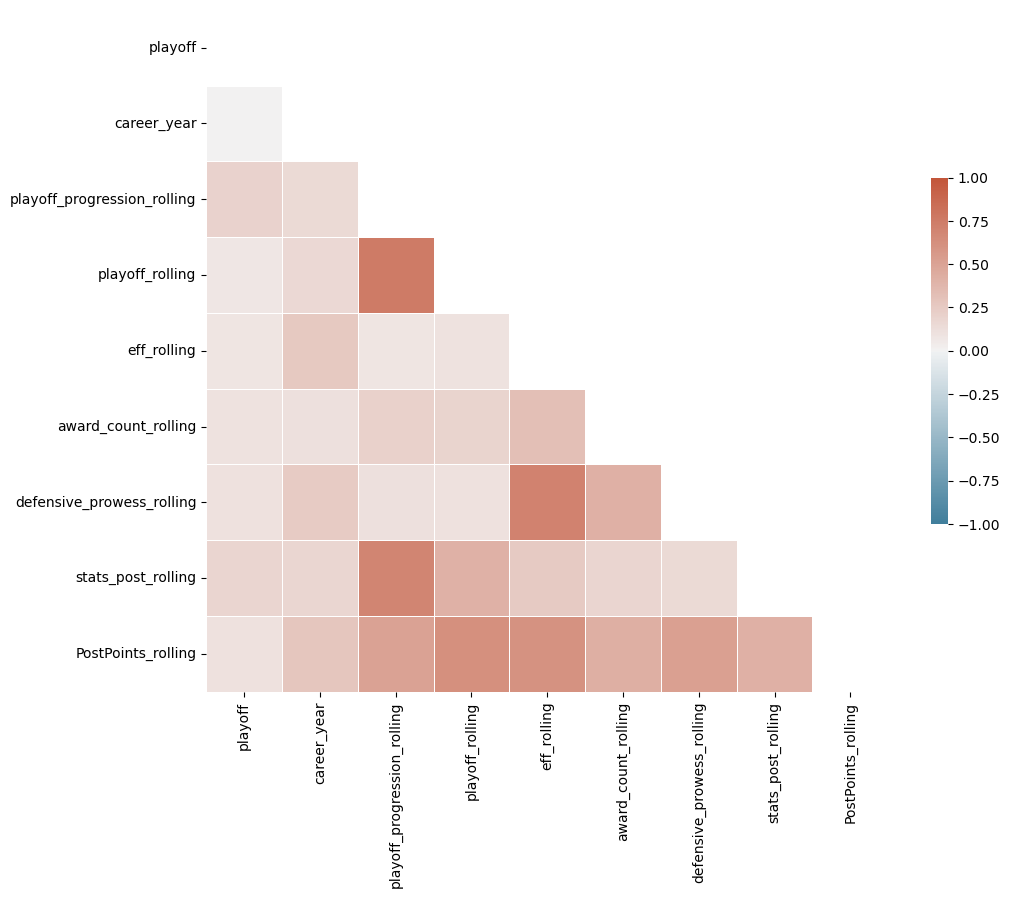

In [142]:
cor_matrix = data[input_cols].corr().abs()
corr_plot(cor_matrix)

In [143]:
val = cor_matrix['playoff'].sort_values(ascending=True)
sorted_columns = val.index.values
sorted_columns

array(['career_year', 'playoff_rolling', 'eff_rolling',
       'award_count_rolling', 'PostPoints_rolling',
       'defensive_prowess_rolling', 'stats_post_rolling',
       'playoff_progression_rolling', 'playoff'], dtype=object)

In [144]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,playoff,career_year,playoff_progression_rolling,playoff_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,stats_post_rolling,PostPoints_rolling
playoff,NaN,0.001314,0.196584,0.070824,0.082826,0.098729,0.107064,0.183895,0.102583
career_year,NaN,NaN,0.149032,0.159607,0.259400,0.110295,0.243609,0.174961,0.275543
playoff_progression_rolling,NaN,NaN,NaN,0.754247,0.079053,0.207511,0.112684,0.690539,0.506364
playoff_rolling,NaN,NaN,NaN,NaN,0.096399,0.191875,0.103210,0.407662,0.621977
eff_rolling,NaN,NaN,NaN,NaN,NaN,0.324535,0.705371,0.254959,0.604689
award_count_rolling,NaN,NaN,NaN,NaN,NaN,NaN,0.416744,0.180010,0.422414
defensive_prowess_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154651,0.518065
stats_post_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419826
PostPoints_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#same table but for position is Guard (aka = 1)
guard_data = data[data['pos'] < 3]
guard_cor_matrix = guard_data[input_cols].corr().abs()

In [146]:
guard_val = guard_cor_matrix['playoff'].sort_values(ascending=True)
guard_sorted_columns = guard_val.index.values
guard_sorted_columns

array(['award_count_rolling', 'career_year', 'eff_rolling',
       'playoff_rolling', 'PostPoints_rolling',
       'defensive_prowess_rolling', 'stats_post_rolling',
       'playoff_progression_rolling', 'playoff'], dtype=object)

In [147]:
guard_upper_tri = guard_cor_matrix.where(np.triu(np.ones(guard_cor_matrix.shape),k=1).astype(bool))
guard_upper_tri

,playoff,career_year,playoff_progression_rolling,playoff_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,stats_post_rolling,PostPoints_rolling
playoff,NaN,0.054131,0.208444,0.064565,0.055383,0.048733,0.096696,0.183548,0.068584
career_year,NaN,NaN,0.058935,0.091610,0.227707,0.093409,0.197122,0.068808,0.266655
playoff_progression_rolling,NaN,NaN,NaN,0.744908,0.023298,0.135529,0.042844,0.647413,0.443427
playoff_rolling,NaN,NaN,NaN,NaN,0.091594,0.159510,0.060190,0.392888,0.613989
eff_rolling,NaN,NaN,NaN,NaN,NaN,0.219874,0.710604,0.203144,0.592350
award_count_rolling,NaN,NaN,NaN,NaN,NaN,NaN,0.319145,0.124994,0.277995
defensive_prowess_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111614,0.481290
stats_post_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352766
PostPoints_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
center_data = data[data['pos']> 3]
center_cor_matrix = center_data[input_cols].corr().abs()

In [149]:
center_val = center_cor_matrix['playoff'].sort_values(ascending=True)
center_sorted_columns = center_val.index.values
center_sorted_columns

array(['career_year', 'defensive_prowess_rolling', 'playoff_rolling',
       'eff_rolling', 'award_count_rolling', 'PostPoints_rolling',
       'playoff_progression_rolling', 'stats_post_rolling', 'playoff'],
      dtype=object)

In [150]:
center_upper_tri = center_cor_matrix.where(np.triu(np.ones(center_cor_matrix.shape),k=1).astype(bool))
center_upper_tri

,playoff,career_year,playoff_progression_rolling,playoff_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,stats_post_rolling,PostPoints_rolling
playoff,NaN,0.034196,0.164855,0.072510,0.092831,0.103166,0.067678,0.171990,0.137223
career_year,NaN,NaN,0.229357,0.220001,0.243876,0.150691,0.272571,0.264051,0.270406
playoff_progression_rolling,NaN,NaN,NaN,0.776399,0.093090,0.203864,0.115880,0.778356,0.580534
playoff_rolling,NaN,NaN,NaN,NaN,0.036290,0.206544,0.080969,0.478060,0.653286
eff_rolling,NaN,NaN,NaN,NaN,NaN,0.344138,0.673419,0.277946,0.569639
award_count_rolling,NaN,NaN,NaN,NaN,NaN,NaN,0.357941,0.182108,0.483968
defensive_prowess_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121522,0.509145
stats_post_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.503311
PostPoints_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
